epoch 1
train mean loss=9525.181893382352
 test mean loss=6087.172395833333
epoch 2
train mean loss=9397.356525735295
 test mean loss=6071.3921875
epoch 3
train mean loss=9439.783363970588
 test mean loss=6047.8421875
epoch 4
train mean loss=9352.63005514706
 test mean loss=6011.113541666667
epoch 5
train mean loss=9354.192095588236
 test mean loss=5952.952604166667
epoch 6
train mean loss=9105.075459558824
 test mean loss=5863.527604166667
epoch 7
train mean loss=9032.790349264706
 test mean loss=5727.125520833333
epoch 8
train mean loss=8693.882444852941
 test mean loss=5521.1984375
epoch 9
train mean loss=8355.356709558824
 test mean loss=5219.219791666666
epoch 10
train mean loss=7878.0554227941175
 test mean loss=4783.225520833334
epoch 11
train mean loss=7023.591727941176
 test mean loss=4182.993229166666
epoch 12
train mean loss=6088.275183823529
 test mean loss=3411.23046875
epoch 13
train mean loss=4751.235891544117
 test mean loss=2501.4973958333335
epoch 14
train mean loss=3

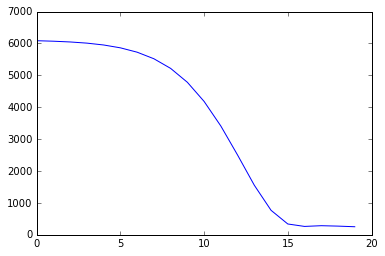

In [42]:
#!/usr/bin/env python
# coding: utf-8
import pandas as pd
temp=pd.read_csv("Univ2.csv",header=None)
temptarget = pd.read_csv("Univ3.csv",header=None)


#from __future__ import print_function
import numpy as np
from sklearn.cross_validation import train_test_split

import six
import sys
import chainer
import chainer.links as L
from chainer import optimizers
import chainer.functions as F
from matplotlib import pyplot
%matplotlib inline


batchsize = 40
n_epoch = 20

# Prepare dataset
target_list=[]
for i in zip(temptarget[0]):
    target_list.append(i)
target = np.array(target_list)

feature_lists = []
for i,j in zip(temp[0],temp[1]):
    feature_lists.append([i,j])
features = np.array(feature_lists)

target=target.astype(np.float32).reshape(len(target_list), 1)
feature=features.astype(np.float32)

x_train, x_test, y_train, y_test = train_test_split(feature, target, test_size=0.15)
N_test = y_test.size  # test data size
N = len(x_train)  # train data size
in_units = x_train.shape[1]  


n_units_2 = 90
n_units_3 = 50
n_units_4 = 30
n_units_5 = 10

model = chainer.Chain(
    l1=L.Linear(in_units, n_units_2),
    l2=L.Linear(n_units_2, n_units_3),
    l3=L.Linear(n_units_3,  n_units_4),
    l4=L.Linear(n_units_4,  n_units_5),
    l5=L.Linear(n_units_5,  1))


def forward(x,t):
    h1 = F.relu(model.l1(x))
    h2 = F.relu(model.l2(h1))
    h3 = F.relu(model.l3(h2))
    h4 = F.relu(model.l4(h3))
    y = model.l5(h4)
    return y
    #return F.tanh(model.l5(h4))
    #return F.reshape(model.l5(h4),(len(t)))
    
    
# Setup optimizer最適化のセットアップ
optimizer = optimizers.Adam()#勾配法のアルゴリズム:Adam
optimizer.setup(model)
#optimizer.add_hokk(optimizer.WeightDecay())#正則化をhook関数として登録

# Learning loop
LOSS = []
Ylist = []
for epoch in six.moves.range(1, n_epoch + 1):
    print('epoch', epoch)
    # training
    perm = np.random.permutation(N)
    sum_loss = 0.0
    for i in six.moves.range(0, N, batchsize):
        x = chainer.Variable(np.asarray(x_train[perm[i:i + batchsize]]))
        t = chainer.Variable(np.asarray(y_train[perm[i:i + batchsize]]))
        model.zerograds()#勾配をゼロ初期化
        y = forward(x,t)
        loss = F.mean_squared_error(y, t)#平均2乗誤差
        sum_loss += loss.data
        loss.backward()#勾配計算
        optimizer.update()#最適化ルーチンを実行
    print('train mean loss={}'.format(sum_loss / N))

    # all test data
    x = chainer.Variable(np.asarray(x_test))#特徴量
    t = chainer.Variable(np.asarray(y_test))#教師データ
    y = forward(x,t)#出力
    loss = F.mean_squared_error(y, t)
    LOSS.append(loss.data/N_test)
    print(' test mean loss={}'.format(loss.data / N_test))
Ylist.append(y.data)
print(LOSS)
pyplot.plot(LOSS)
#print(Ylist)


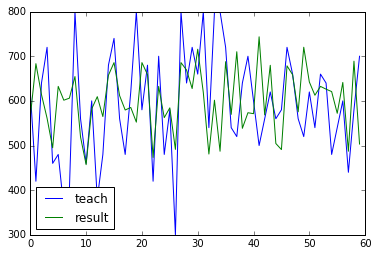

In [51]:
hikaku = []
hikaku2 = []
hikaku = hikaku.append(Ylist)
hikaku2 = hikaku2.append(t.data)
h = [Ylist,t.data]
pyplot.plot(t.data,label="teach")
pyplot.plot(y.data,label="result")
pyplot.legend(loc = 'lower left')